In [46]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import pyforest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


In [47]:
##loading the data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<h1>Data cleaning </h1>

<h3>Checking the data Quality</h3>

<p> Checking if the data contains any Na </p>

In [48]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<h1>Droping unwanted colunmn</h1>

<p> We can observe that there is no need of instance column,dteday column, casual and registered column </p>

In [50]:
df=df.drop(['instant', 'dteday','casual','registered'], axis=1)


In [51]:
df.tail(50)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
680,4,1,11,1,1,0,1,19.885000,23.76915,74.1667,11.625639,6269
681,4,1,11,0,2,1,2,14.076653,16.16125,66.2917,22.917082,4094
682,4,1,11,0,3,1,1,11.855847,14.07815,55.2083,13.374875,5495
683,4,1,11,0,4,1,2,13.188347,16.22460,62.0417,10.250129,5445
684,4,1,11,0,5,1,1,14.145000,17.36020,52.4583,11.458675,5698
685,4,1,11,0,6,0,1,13.325000,16.31915,54.5417,12.041843,5629
686,4,1,11,0,0,0,1,14.042500,16.88730,69.2917,15.250004,4669
687,4,1,11,0,1,1,2,15.614153,18.78105,62.3333,15.749489,5499
688,4,1,11,0,2,1,2,15.340847,19.03335,68.5000,5.542575,5634
689,4,1,11,0,3,1,1,14.486653,18.24460,61.3750,6.917482,5146


<h3>Checking for duplicates</h3>

In [52]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

<p> As we can see, there are no duplicates in the dataframe</p>

In [53]:
#Checking the shape
df.shape

(730, 12)

<h2> Renaming some of the values in column </h2>

In [54]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [55]:
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [56]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [57]:
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


<h1>Data Visualisation </h2>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

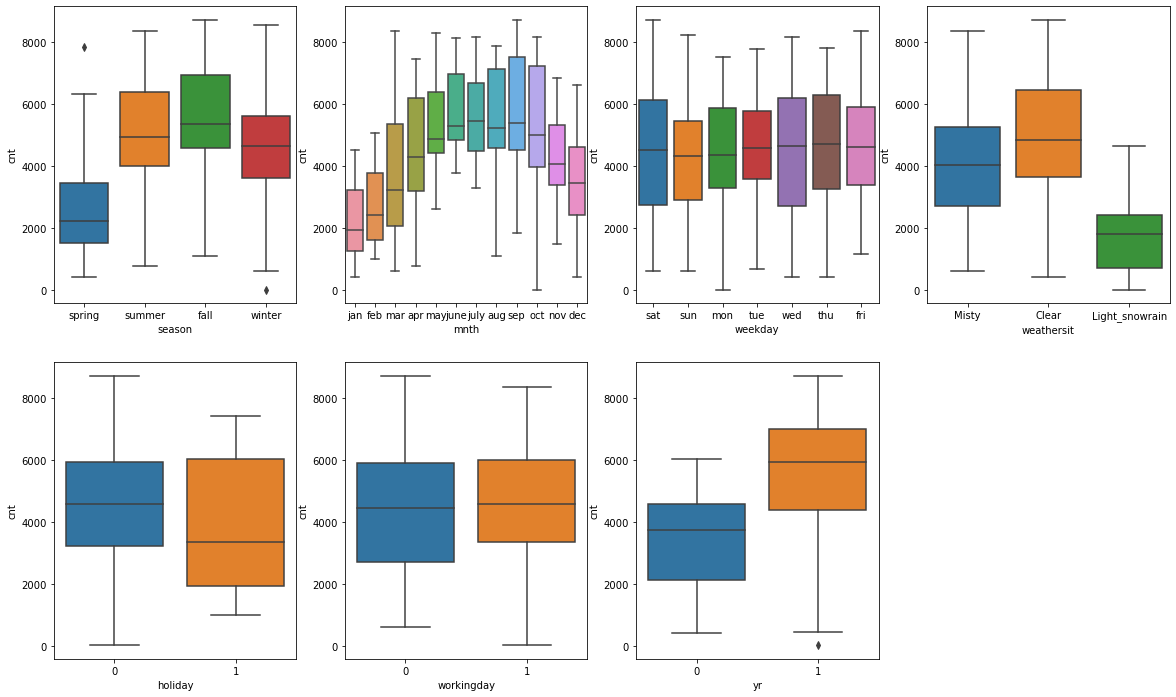

In [58]:
##visualising the categorical variable on boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

<h3>Let us now look if any of the categorical varible affects the count of users</h3>
<p>Let us first check season vs cnt</p>




<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='season', ylabel='cnt'>

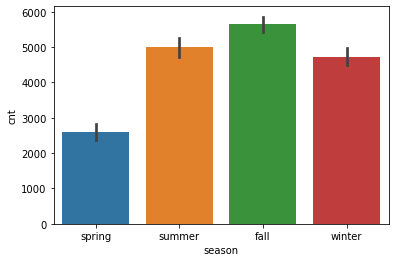

In [59]:
sns.barplot(x = 'season',y = 'cnt',data = df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='yr', ylabel='cnt'>

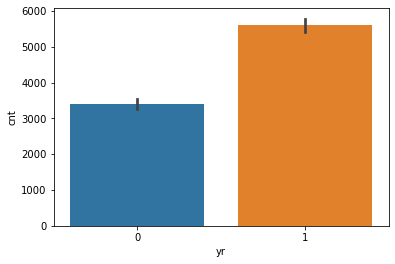

In [60]:
sns.barplot(x = 'yr',y = 'cnt',data = df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

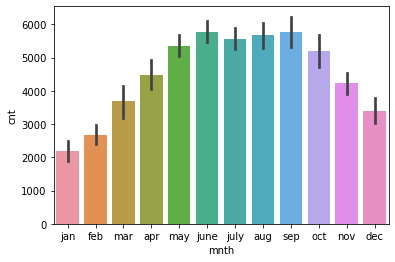

In [61]:
sns.barplot(x = 'mnth',y = 'cnt',data = df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

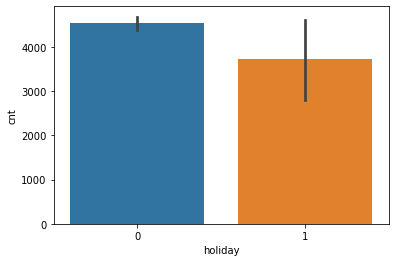

In [62]:
sns.barplot(x = 'holiday',y = 'cnt',data = df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

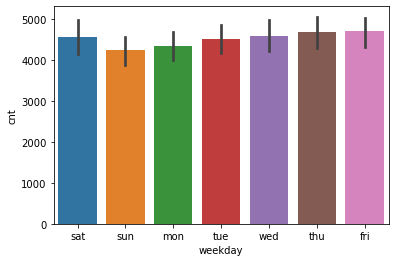

In [63]:
sns.barplot(x = 'weekday',y = 'cnt',data = df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

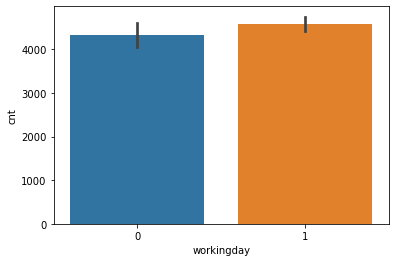

In [64]:
sns.barplot(x = 'workingday',y = 'cnt',data = df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

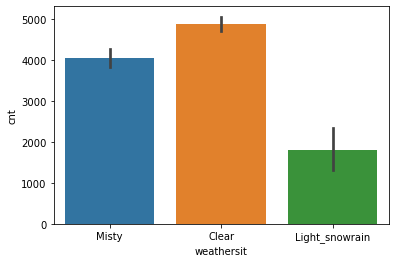

In [65]:
sns.barplot(x = 'weathersit',y = 'cnt',data = df)

<h1>Conclusion from barplot </h1>
<p>1.From months vs cnt plot we can deduce that, the number of bikesharing is incresed as the temperature is increasing <p>
<p> The reason of this increase could be , usually people do not prefer to ride on bike when the its cold season<p>
<p>2. From the Holiday vs count plot , we can deduce that when it is neighter weekend nor holiday.The demand of bikesharing has increase<p>



<h3> Plotting the continuous on scatter plot and understanding the data</h3>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

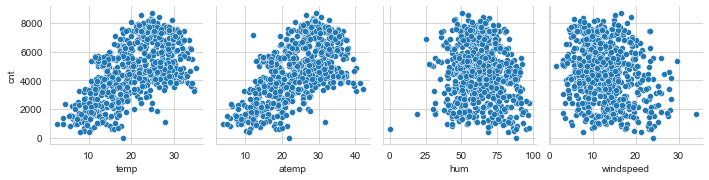

In [66]:
sns.set_style("whitegrid")
sns.pairplot(data = df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt')
#df.tail(50)

<h1>Data preparation </h1>

In [67]:
df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


<IPython.core.display.Javascript object>

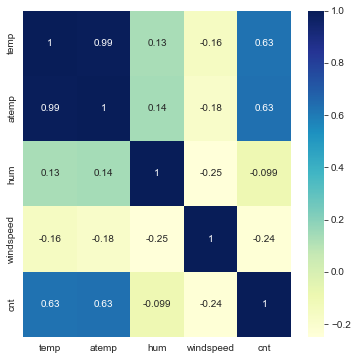

In [68]:
plt.figure(figsize = (6,6))
dataplot = sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True,cmap="YlGnBu")


# displaying heatmap
plt.show()

<p> From the above heatmap , we can see atemp and temp are higly correlated so we will drop these columns<p>

<h2> Preparing data for model <h2>

In [69]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [70]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [71]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [72]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [73]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [74]:
# check the head of new dataframe

df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [75]:
# check the shape of new dataframe

df_new.shape

(730, 30)

<h1>Step 4: Splitting the Data into Training and Testing Sets<h1>

In [76]:
df_train,df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [77]:
#checking the shape of train set

df_train.shape

(510, 30)

In [78]:
#checking the shape of test set
df_test.shape

(219, 30)

<h3> Data normalisation <h3>

In [79]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [80]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<IPython.core.display.Javascript object>

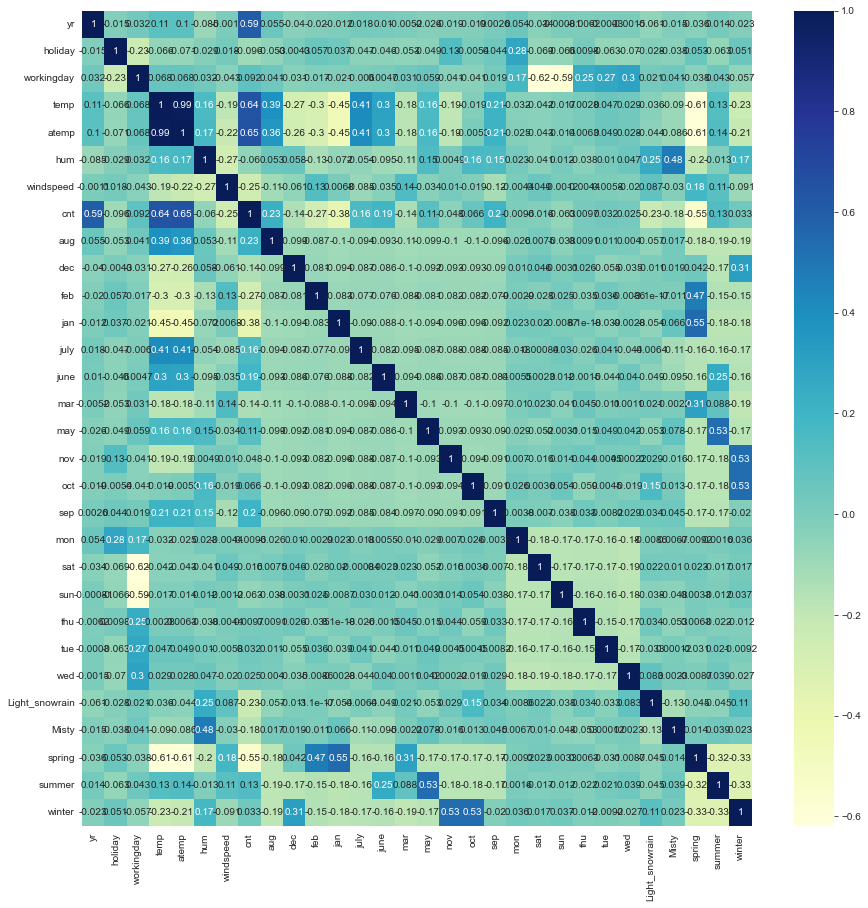

In [81]:
plt.figure(figsize =(15,15))
sns.heatmap(df_train.corr(),annot = True,cmap="YlGnBu")
plt.show()

<p> 1.As we can see year is very much correlated to count<br>
    2. Also count is very much correlated to temp and a temp</p>

<p> Let's see a pairplot for temp vs cnt. </p>

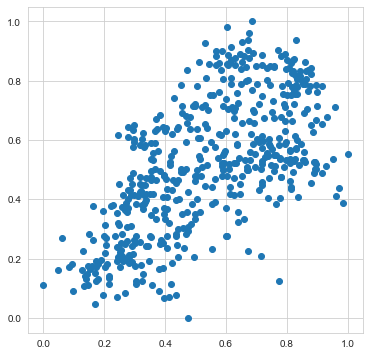

In [82]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

<p> So from here we can pick temp as our first variable to prepare model</p>

<h1>Devide X and Y set for the model building </h1>

In [83]:
y_train = df_train.pop('cnt')
x_train = df_train

<h1>Building linear regression model </h1>


In [84]:
import statsmodels.api as sm

#creating constant
x_train_lm = sm.add_constant(x_train)


In [85]:
lr = LinearRegression()
lr.fit(x_train,y_train)

<IPython.core.display.Javascript object>

LinearRegression()

In [86]:
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(x_train,y_train)

In [87]:
#List of variables selected in top 15 list

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [88]:
# selecting  variable via RFE in col list

col = x_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [89]:
x_train_rfe = x_train[col]

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [91]:
vif_data = pd.DataFrame()

In [92]:
vif_data["feature"] = df_new.columns

In [93]:
#  created function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [94]:
 #dataframe with RFE selected variables

X_train_rfe = x_train[col]

In [95]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.69
8,sat,12.20
9,sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.61
4,hum,1.91
11,Misty,1.57


In [96]:
#Create first fitted model
lr= sm.OLS(y_train,x_train_rfe).fit()

lr.params

yr                0.229738
holiday           0.179945
workingday        0.282595
temp              0.527819
hum              -0.159467
windspeed        -0.180601
july             -0.054881
sep               0.081773
sat               0.292582
sun               0.239379
Light_snowrain   -0.246332
Misty            -0.057847
spring           -0.055434
summer            0.052613
winter            0.100294
dtype: float64

In [97]:
#print lr summary

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.13e-191
Time:                        10:07:45   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
yr                 0.2297      0.008     28.

In [98]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,28.28
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.37
12,summer,2.78
10,Misty,2.30
0,yr,2.08
5,july,1.59
6,sep,1.39


In [99]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.13e-191
Time:                        10:07:45   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2826      0.034      8.

In [100]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.62
11,summer,2.23
10,spring,2.13
0,yr,2.07
12,winter,1.84
4,july,1.59
9,Misty,1.55
5,sep,1.34
6,sat,1.23


In [101]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          5.73e-189
Time:                        10:07:45   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2039      0.029      6.

In [102]:
# As july shows high p values hence we can drop it
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.62
2,temp,3.96
0,yr,2.07
9,spring,2.04
10,summer,1.90
11,winter,1.68
8,Misty,1.55
4,sep,1.23
5,sat,1.23
6,sun,1.22


In [103]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.48e-188
Time:                        10:07:46   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     497   BIC:                            -928.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1960      0.029      6.

In [104]:
# As spring shows high p values hence we can drop it
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.76
3,windspeed,3.17
0,yr,2.00
9,summer,1.56
8,Misty,1.48
10,winter,1.39
4,sep,1.21
5,sat,1.21
6,sun,1.20
7,Light_snowrain,1.08


In [105]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.8
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          2.92e-188
Time:                        10:07:51   Log-Likelihood:                 501.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     498   BIC:                            -927.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1328      0.017      7.

In [109]:
y_train_pred = lr_5.predict(X_train_lm_5)

<IPython.core.display.Javascript object>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

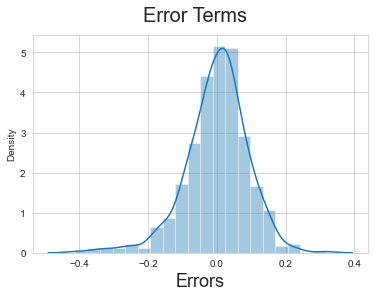

In [110]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

<h3> Multi Colinearity</h3>

In [111]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.76
3,windspeed,3.17
0,yr,2.00
9,summer,1.56
8,Misty,1.48
10,winter,1.39
4,sep,1.21
5,sat,1.21
6,sun,1.20
7,Light_snowrain,1.08


<h2> Homoscedasticity </h2>

<IPython.core.display.Javascript object>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


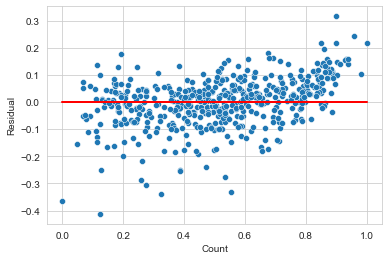

In [126]:

y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<h1>Predictions Using the Final Model</h1>

In [113]:
# scaling the test dataset



num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [114]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
y_test = df_test.pop('cnt')
X_test = df_test


In [116]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [117]:
y_pred = lr_5.predict(X_test_lm_6)

In [118]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7963

Text(0, 0.5, 'y_pred')

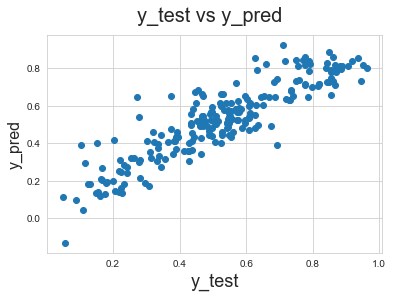

In [119]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [120]:
round(lr_5.params,4)

const             0.1328
yr                0.2329
holiday          -0.1050
temp              0.5477
windspeed        -0.1543
sep               0.0992
sat               0.0113
sun              -0.0479
Light_snowrain   -0.2893
Misty            -0.0818
summer            0.0868
winter            0.1321
dtype: float64

In [121]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7855


<IPython.core.display.Javascript object>

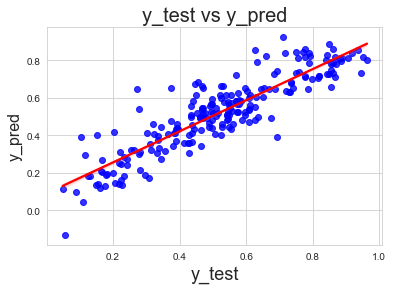

In [122]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()